In [1]:
import scipy.io as io
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

sb.set_style('darkgrid')

In [2]:
# datos
mat = io.loadmat('Faraday_con_ruido.mat')
faraday = pd.DataFrame(mat['S'], columns=['S'], index = mat['t'][0])
faraday.index = faraday.index*1000
faraday.head() #muestra en milisegundos

,S
0.0,0.550278
1.0,0.550117
2.0,0.549151
3.0,0.549151
4.0,0.546252


In [3]:
noise = pd.read_csv('N1000mV.txt', sep='\t', header=None)
noise.drop([0], axis=1, inplace=True)
noise.columns = ['un1', 'un2']
noise.head()

,un1,un2
0,0.000224,-0.500555
1,0.000063,-0.503776
2,0.000224,-0.505064
3,0.000063,-0.507479
4,-0.000098,-0.511505


In [4]:
## Gráficos

faraday['dS'] = np.gradient(faraday['S'].values)
faraday['d2S'] = np.gradient(faraday['dS'].values)


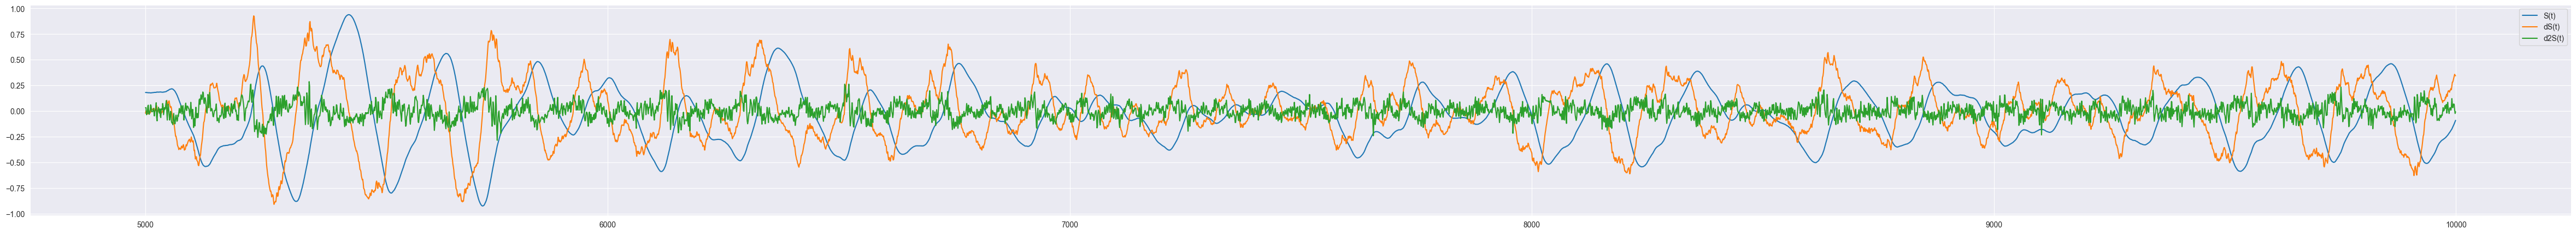

In [6]:

x = 5000
y = 10000
plt.figure(figsize=(60, 5))
plt.plot(faraday.index[x:y], faraday.S[x:y-1], label='S(t)')
plt.plot(faraday.index[x:y], faraday.dS[x:y-1]*30, label='dS(t)')
plt.plot(faraday.index[x:y], faraday.d2S[x:y-1]*100, label='d2S(t)')
plt.savefig("faraday_1000a3000.png", dpi=600)
plt.legend()
plt.show()

In [7]:
## noise

noise['dun2'] = np.gradient(noise['un2'].values)
noise['d2un2'] = np.gradient(noise['dun2'].values)

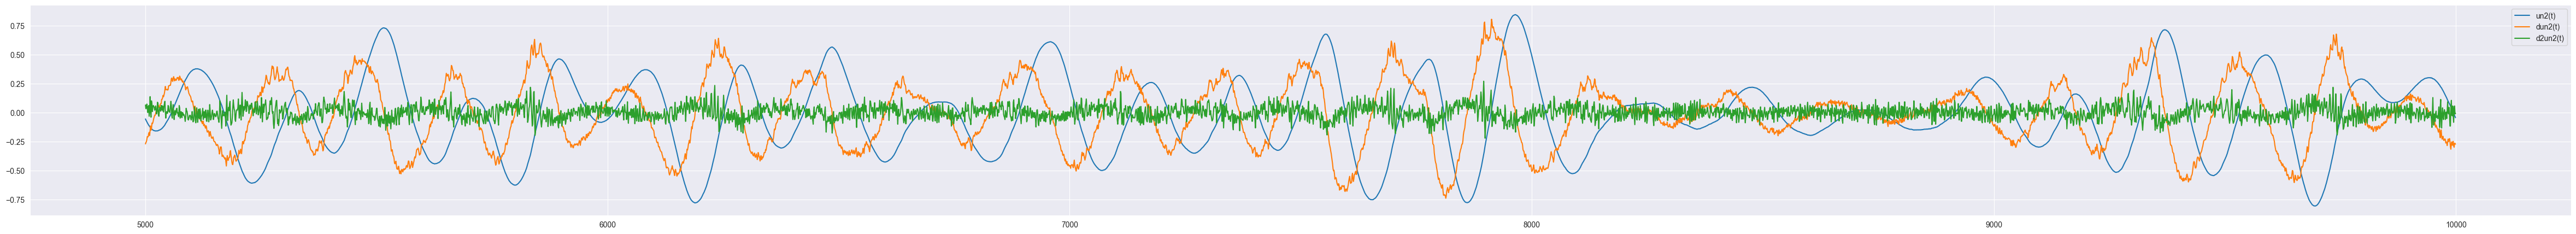

In [8]:
plt.figure(figsize=(60,5))
plt.plot(noise.index[x:y], noise.un2[x:y], label='un2(t)')
plt.plot(noise.index[x:y], noise.dun2[x:y]*30, label='dun2(t)')
plt.plot(noise.index[x:y], noise.d2un2[x:y]*100, label='d2un2(t)')
plt.legend()
plt.savefig("noise_5000a10000.png", dpi=600)

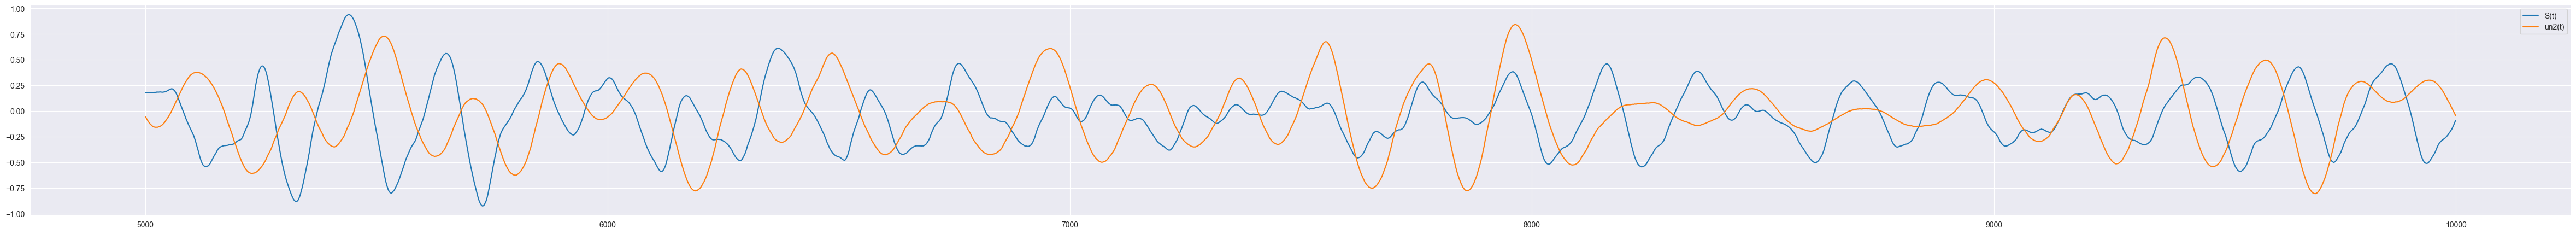

In [9]:
#noise and faraday+noise

plt.figure(figsize=(60,5))
plt.plot(faraday.index[x:y], faraday.S[x:y-1], label='S(t)')
plt.plot(noise.index[x:y], noise.un2[x:y], label='un2(t)')

plt.legend()
plt.savefig("faraday_noise_5000a10000.png", dpi=600)
plt.show()

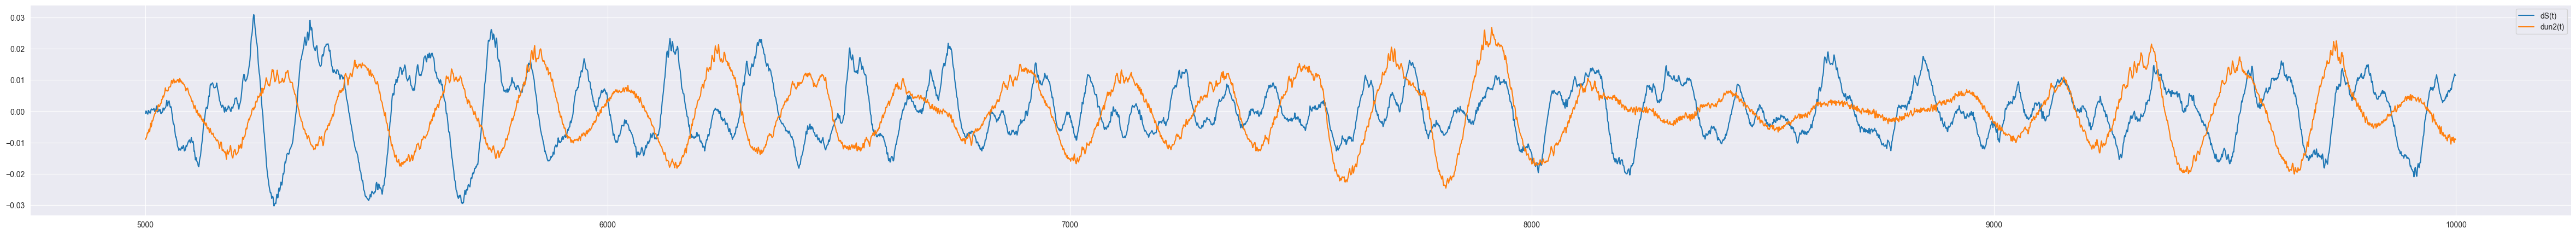

In [10]:
#dnoise and dfaraday+noise
plt.figure(figsize=(60,5))
plt.plot(faraday.index[x:y], faraday.dS[x:y-1], label='dS(t)')
plt.plot(noise.index[x:y], noise.dun2[x:y], label='dun2(t)')
plt.legend()
plt.savefig("faraday_dnoise_5000a10000.png", dpi=600)
plt.show()

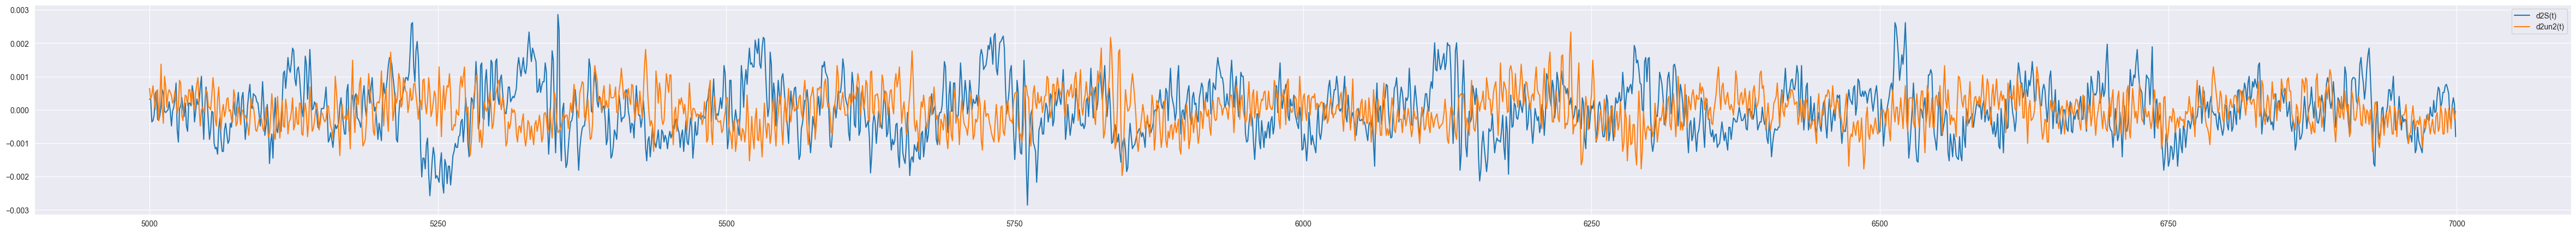

In [11]:
# d2noise and d2faraday+noise
x = 5000
y = 7000
plt.figure(figsize=(60,5))
plt.plot(faraday.index[x:y], faraday.d2S[x:y-1], label='d2S(t)')
plt.plot(noise.index[x:y], noise.d2un2[x:y], label='d2un2(t)')
plt.legend()
plt.savefig("faraday_d2noise_5000a7000.png", dpi=600)
plt.show()